In [1]:
import numpy as np
import pandas as pd
import datetime as d
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
SH50 = pd.read_excel("50ETF.xlsx")
SH50

,date,open
0,2021-12-17,3.312
1,2021-12-16,3.304
2,2021-12-15,3.332
3,2021-12-14,3.341
4,2021-12-13,3.375
...,...,...
4088,2005-03-01,0.870
4089,2005-02-28,0.878
4090,2005-02-25,0.877
4091,2005-02-24,0.876


In [3]:
ru = pd.read_csv("russell.csv")
ru = ru.drop(labels='Unnamed: 2', axis=1)
ru

,date,open
0,2021-06-30,255.770004
1,2021-06-29,256.429993
2,2021-06-28,256.239990
3,2021-06-25,255.440002
4,2021-06-24,254.210007
...,...,...
5302,2000-06-02,81.250000
5303,2000-06-01,78.156250
5304,2000-05-31,77.687500
5305,2000-05-30,76.031250


In [4]:
# import the dataset
account = pd.read_csv("SH_50_bank_betahedged.csv") # change the name for the dataset of strat
account = account.rename(columns = {'Unnamed: 0':'date'})
account['PnL'] = account['NAV'] - account['NAV'].shift(1)
account

,date,cash,notionals,fee_incurred,hedge_notional,hedge_position,long_notionals,short_notionals,NAV,PnL
0,2007-12-10,1.000000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+07,NaN
1,2007-12-11,9.134210e+06,1.250000e+06,4462.500000,-388672.917577,-94544.616292,5.000000e+06,-3.750000e+06,9.995538e+06,-4462.500000
2,2007-12-12,9.133082e+06,1.124187e+06,1128.600037,-382905.695983,-94544.616292,4.886188e+06,-3.762000e+06,9.874364e+06,-121173.930942
3,2007-12-13,9.131946e+06,1.056376e+06,1136.242006,-377043.929773,-94544.616292,4.843849e+06,-3.787473e+06,9.811278e+06,-63085.923149
4,2007-12-14,9.130859e+06,9.531446e+05,1087.054537,-362200.425015,-94544.616292,4.576660e+06,-3.623515e+06,9.721803e+06,-89474.945407
...,...,...,...,...,...,...,...,...,...,...
3651,2017-12-08,1.380873e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279564e+07,41416.744938
3652,2017-12-09,1.380693e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279385e+07,-1795.524663
3653,2017-12-10,1.380513e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279205e+07,-1795.524663
3654,2017-12-11,1.288007e+07,-4.656613e-10,7438.497970,0.000000,0.000000,-2.328306e-10,4.656613e-10,1.288007e+07,88020.526245


In [39]:
# benchmark strat in refinements 
account2 = pd.read_csv("SH_50_basic_betahedged.csv")
account2 = account2.rename(columns = {'Unnamed: 0':'date'})
account2['PnL'] = account2['NAV'] - account2['NAV'].shift(1)
account2

,date,cash,notionals,fee_incurred,hedge_notional,hedge_position,long_notionals,short_notionals,NAV,PnL
0,2007-12-10,1.000000e+07,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+07,NaN
1,2007-12-11,9.134210e+06,1.250000e+06,4462.500000,-388672.917577,-94544.616292,5.000000e+06,-3.750000e+06,9.995538e+06,-4462.500000
2,2007-12-12,9.133082e+06,1.124187e+06,1128.600037,-382905.695983,-94544.616292,4.886188e+06,-3.762000e+06,9.874364e+06,-121173.930942
3,2007-12-13,9.131946e+06,1.056376e+06,1136.242006,-377043.929773,-94544.616292,4.843849e+06,-3.787473e+06,9.811278e+06,-63085.923149
4,2007-12-14,9.130859e+06,9.531446e+05,1087.054537,-362200.425015,-94544.616292,4.576660e+06,-3.623515e+06,9.721803e+06,-89474.945407
...,...,...,...,...,...,...,...,...,...,...
3651,2017-12-08,1.380873e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279564e+07,41416.744938
3652,2017-12-09,1.380693e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279385e+07,-1795.524663
3653,2017-12-10,1.380513e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279205e+07,-1795.524663
3654,2017-12-11,1.288007e+07,-4.656613e-10,7438.497970,0.000000,0.000000,-2.328306e-10,4.656613e-10,1.288007e+07,88020.526245


In [5]:
# merge index with strat data, SH 50, ru
merge_benchmark = pd.merge(SH50,account,on='date') # change for sh, ru
merge_benchmark = merge_benchmark.dropna(axis='rows')
merge_benchmark = merge_benchmark.sort_values(by ='date', ascending = 1)
merge_benchmark.reindex()



,date,open,cash,notionals,fee_incurred,hedge_notional,hedge_position,long_notionals,short_notionals,NAV,PnL
2434,2007-12-11,4.111,9.134210e+06,1.250000e+06,4462.500000,-388672.917577,-94544.616292,5.000000e+06,-3.750000e+06,9.995538e+06,-4462.500000
2433,2007-12-12,4.050,9.133082e+06,1.124187e+06,1128.600037,-382905.695983,-94544.616292,4.886188e+06,-3.762000e+06,9.874364e+06,-121173.930942
2432,2007-12-13,3.988,9.131946e+06,1.056376e+06,1136.242006,-377043.929773,-94544.616292,4.843849e+06,-3.787473e+06,9.811278e+06,-63085.923149
2431,2007-12-14,3.831,9.130859e+06,9.531446e+05,1087.054537,-362200.425015,-94544.616292,4.576660e+06,-3.623515e+06,9.721803e+06,-89474.945407
2430,2007-12-17,3.947,9.127549e+06,8.976754e+05,1135.017270,-373167.600505,-94544.616292,4.681066e+06,-3.783391e+06,9.652057e+06,-67571.368814
...,...,...,...,...,...,...,...,...,...,...,...
4,2017-12-06,2.899,1.381234e+07,-1.030114e+06,1822.425774,-0.000000,-0.000000,5.044639e+06,-6.074753e+06,1.278223e+07,-36496.087559
3,2017-12-07,2.870,1.381052e+07,-1.056296e+06,1818.554361,-0.000000,-0.000000,5.005552e+06,-6.061848e+06,1.275423e+07,-28000.350780
2,2017-12-08,2.839,1.380873e+07,-1.013083e+06,1795.524663,-0.000000,-0.000000,4.971999e+06,-5.985082e+06,1.279564e+07,41416.744938
1,2017-12-11,2.865,1.288007e+07,-4.656613e-10,7438.497970,0.000000,0.000000,-2.328306e-10,4.656613e-10,1.288007e+07,88020.526245


In [79]:
D = len(merge_benchmark.index)
D

2435

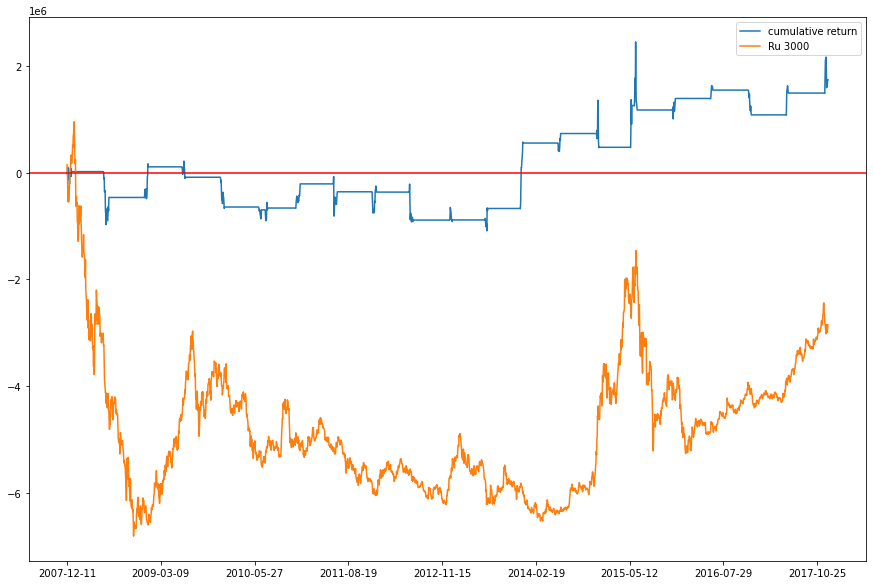

In [80]:
# plot cumulative returns against benchmark index

plt.figure(figsize=(15, 10))
plt.plot(merge_benchmark['date'],merge_benchmark['NAV'] - 1e7, label = 'cumulative return')
plt.plot(merge_benchmark['date'],(1e7/merge_benchmark.loc[merge_benchmark.index[1], "open"]) * merge_benchmark['open'] - 1e7, label = 'Ru 3000')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(300))
plt.show()

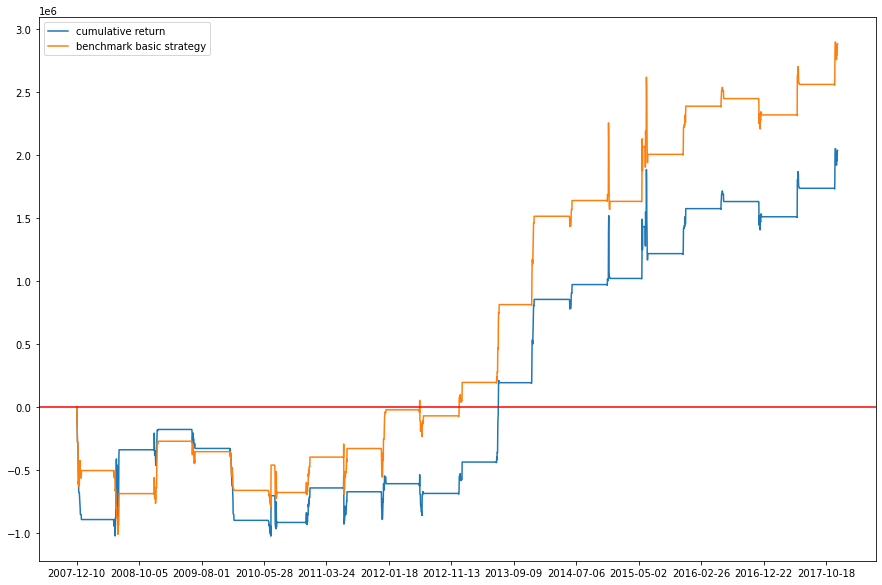

In [109]:
# plot cumulative returns against benchmark strat

plt.figure(figsize=(15, 10))
plt.plot(account['date'],account['NAV'] - 1e7, label = 'cumulative return')
plt.plot(account2['date'],account2['NAV'] - 1e7, label = 'benchmark basic strategy')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(300))
plt.show()

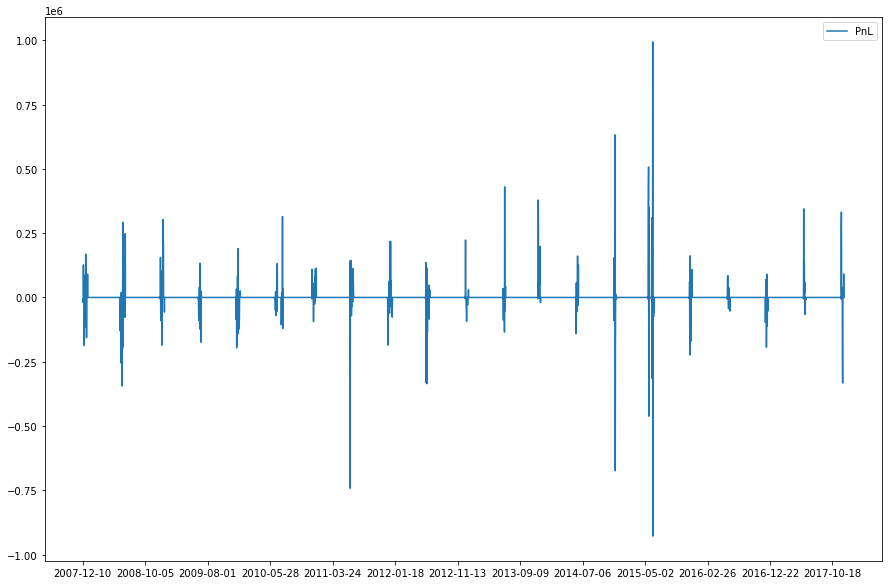

In [78]:
# plot PnL daily returns

plt.figure(figsize=(15, 10))
plt.plot(account['date'],account['PnL'], label='PnL')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(300))
plt.show()


In [81]:
# delete non trade days
account = account.dropna(axis='rows')
account = account[(account['PnL'] != 0)]
account

,date,cash,notionals,fee_incurred,hedge_notional,hedge_position,long_notionals,short_notionals,NAV,PnL
1,2007-12-11,1.401448e+07,1.000000e+07,5100.00000,-1.401958e+07,-3.410260e+06,1.000000e+07,0,9.994900e+06,-5100.000000
2,2007-12-12,1.401448e+07,9.772375e+06,0.00000,-1.381155e+07,-3.410260e+06,9.772375e+06,0,9.975301e+06,-19599.017827
3,2007-12-13,1.401448e+07,9.687699e+06,0.00000,-1.360012e+07,-3.410260e+06,9.687699e+06,0,1.010206e+07,126759.670642
4,2007-12-14,1.401448e+07,9.153319e+06,0.00000,-1.306470e+07,-3.410260e+06,9.153319e+06,0,1.010309e+07,1031.523739
7,2007-12-17,1.401448e+07,9.362133e+06,0.00000,-1.346030e+07,-3.410260e+06,9.362133e+06,0,9.916315e+06,-186776.925025
...,...,...,...,...,...,...,...,...,...,...
3648,2017-12-05,1.155761e+07,9.411788e+06,0.00000,-9.041404e+06,-3.172422e+06,9.411788e+06,0,1.192800e+07,-241306.949124
3649,2017-12-06,1.155761e+07,9.234415e+06,0.00000,-9.196853e+06,-3.172422e+06,9.234415e+06,0,1.159518e+07,-332821.001329
3650,2017-12-07,1.155761e+07,9.162866e+06,0.00000,-9.104853e+06,-3.172422e+06,9.162866e+06,0,1.161563e+07,20450.819401
3651,2017-12-08,1.155761e+07,9.101445e+06,0.00000,-9.006507e+06,-3.172422e+06,9.101445e+06,0,1.165255e+07,36924.258678


In [82]:
# delete non trade days
merge_benchmark = merge_benchmark.dropna(axis='rows')
merge_benchmark = merge_benchmark[(merge_benchmark['PnL'] != 0)]
merge_benchmark

,date,open,cash,notionals,fee_incurred,hedge_notional,hedge_position,long_notionals,short_notionals,NAV,PnL
2434,2007-12-11,4.111,1.401448e+07,1.000000e+07,5100.00000,-1.401958e+07,-3.410260e+06,1.000000e+07,0,9.994900e+06,-5100.000000
2433,2007-12-12,4.050,1.401448e+07,9.772375e+06,0.00000,-1.381155e+07,-3.410260e+06,9.772375e+06,0,9.975301e+06,-19599.017827
2432,2007-12-13,3.988,1.401448e+07,9.687699e+06,0.00000,-1.360012e+07,-3.410260e+06,9.687699e+06,0,1.010206e+07,126759.670642
2431,2007-12-14,3.831,1.401448e+07,9.153319e+06,0.00000,-1.306470e+07,-3.410260e+06,9.153319e+06,0,1.010309e+07,1031.523739
2430,2007-12-17,3.947,1.401448e+07,9.362133e+06,0.00000,-1.346030e+07,-3.410260e+06,9.362133e+06,0,9.916315e+06,-186776.925025
...,...,...,...,...,...,...,...,...,...,...,...
5,2017-12-05,2.850,1.155761e+07,9.411788e+06,0.00000,-9.041404e+06,-3.172422e+06,9.411788e+06,0,1.192800e+07,-241306.949124
4,2017-12-06,2.899,1.155761e+07,9.234415e+06,0.00000,-9.196853e+06,-3.172422e+06,9.234415e+06,0,1.159518e+07,-332821.001329
3,2017-12-07,2.870,1.155761e+07,9.162866e+06,0.00000,-9.104853e+06,-3.172422e+06,9.162866e+06,0,1.161563e+07,20450.819401
2,2017-12-08,2.839,1.155761e+07,9.101445e+06,0.00000,-9.006507e+06,-3.172422e+06,9.101445e+06,0,1.165255e+07,36924.258678


In [84]:
# annualized return 
D2 = len(merge_benchmark.index)
return_annualized = (merge_benchmark['NAV'].iloc[-1] / merge_benchmark['NAV'].iloc[0] ) ** (20/D2) - 1 
# 20 for sh, 40 for Russel, 252 for bank
return_annualized

0.01229221988689222

In [85]:
# annualized volatility
interday_return = merge_benchmark['NAV'] / merge_benchmark['NAV'].shift(1) - 1

volatility_annualized = np.std(interday_return) * np.sqrt(25) 
# 20 for sh, 40 for Russel, 252 for bank
volatility_annualized

0.08083414125448737

In [86]:
# VaR
interday_return_nonnan = [x for x in interday_return if np.isnan(x) == False]
interday_return_clean = pd.DataFrame([i for i in interday_return_nonnan if i != 0])

conf_level = 0.05

# interday_return_clean
VaR = interday_return_clean.quantile(conf_level)
VaR


0   -0.019883
Name: 0.05, dtype: float64

In [87]:
# calculate Expected Shortfall

ETL = interday_return_clean[interday_return_clean<VaR].to_numpy()
ETL = [x for x in ETL if np.isnan(x) == False]
ETL = sum(ETL).item()/len(ETL)
# ETL = sum(e for e in interday_return_nonzero if e < (-0.009016))
ETL

-0.03690873972417556

In [88]:
# IR
annualized_return_index = (merge_benchmark['open'].iloc[-1] / merge_benchmark['open'].iloc[0] ) ** (252/D) - 1

IR = (return_annualized - annualized_return_index)/volatility_annualized # changes for SH and RU
IR

0.6058438786886836

In [89]:
annualized_return_index

-0.03668064978119534

In [90]:
# annualized fee 

fee = np.sum(merge_benchmark['fee_incurred'])/11 # 10 for sh, 13 for ru, 3 for sh oos, 6 for ru oos
fee

32915.550184603715

In [91]:
benchmark_daily_return = np.array((merge_benchmark['open'] / merge_benchmark['open'].shift(1) - 1).dropna())
real_daily_return = np.array((merge_benchmark['NAV'] / merge_benchmark['NAV'].shift(1) - 1).dropna())
beta = np.cov(benchmark_daily_return,real_daily_return)/(np.std(real_daily_return)**2)
beta


array([[16.94184598, -0.09552242],
       [-0.09552242,  1.00381679]])

In [92]:
corr = np.cov(benchmark_daily_return,real_daily_return)/(np.std(real_daily_return)*np.std(benchmark_daily_return))
corr

array([[ 4.12389494, -0.02325156],
       [-0.02325156,  0.2443438 ]])